## Why contrast?

I predict that if we can better contrast the foreground and background of the original image, Otsu will work better. It could be useful to use my knowledge of HSV and image filtering to do this.

The image below is the original image in greyscale. , which seems perfectly useful.

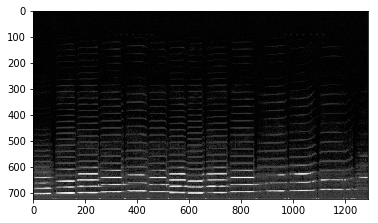

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('violin.png')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale, cmap = 'gray')
plt.show()

Let's take the image in greyscale and perform some morphological operations to create contrast.

- erosion: erodes the boundaries of the foreground of an image
- dilation: joins broken parts of an object, often after erosion so as to eliminate noise
- opening: this is actually performing erosion and then dilation, but in one 'method()'
- closingz: dilation followed by erosion
- gradient

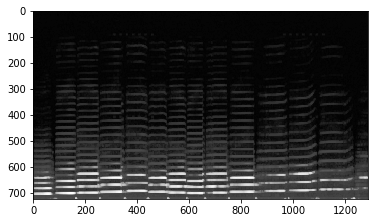

In [46]:
import cv2
import numpy as np

img = cv2.imread('violin.png',0)
kernel = np.ones((5,5),np.uint8)

# we don't likely want erosion for this, but let's see what it does
erosion = cv2.erode(img,kernel,iterations = 1)

dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)


# Try any by changing the first argument. Set by default to 'opening'

plt.imshow(dilation, cmap = 'gray')
plt.show()

Some of these operations are morphological, but they are designed to make certain features of an image more salient or less salient. The dilation() method seems to work very well for this particular image. The columns look more clear than ever.

#### Guass

"It is not knowledge, but the act of learning, not possession but the act of getting there, which grants the greatest enjoyment."

One of the greatest mathematical minds in history (in good company with with Euler, Laplace, etc) whose formulations have found great impact in computation!

In image processing, it seems that equations of Laplace and Guass have found tremendous use. In particular, Guassian blurring is a common operation for smoothing an image by means of convulving an image with the Guassian function:

$f(x) = a e^{-\frac{(x-b)^2}{2c^2}}$

Well, here is what it looks like to blur an image in such a way.

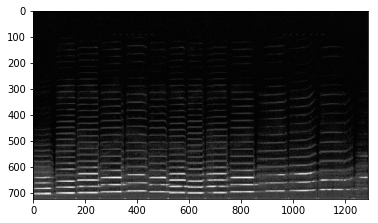

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('violin.png')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grayscale,(5,5),0)
smooth = cv2.addWeighted(blur,1.5,grayscale,-0.5,0)
plt.imshow(smooth, cmap = 'gray')
plt.show()

